# Visualization

We will use the California housing prices dataset to demonstrate different visualization techniques and their benefits.

We first import all the Python packages we will be using for our code.

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

We then set our global parameters for this notebook

In [21]:
# globals
%matplotlib inline
CUTOFF = 2 # in thousands
LABEL_FONTSIZE = 20
LEGEND_SIZE = 20
PLOT_COLOR = '#900c3f'
ALT_COLOR = '#17706e'
PLOT_COLORMAP_DIV = 'jet'
TEST_SIZE = 0.2
RANDOM_STATE = 42  # for reproducibility in the universe, life and everything
TICK_SIZE = 20

We import our data into the notebook. Our first "visualization" is to learn how many descriptors we have and what the dataset's size is.

In [22]:
dataset = fetch_california_housing()
# let's look at the data
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
labels = dataset.target
print('Features ')
print(X.columns)
print(f'X.shape: {dataset.data.shape}    y.shape: {dataset.target.shape}')

Features 
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')
X.shape: (20640, 8)    y.shape: (20640,)


We plot a histogram of the target response: the value of the house. Try switching the bins from 10 to 100.

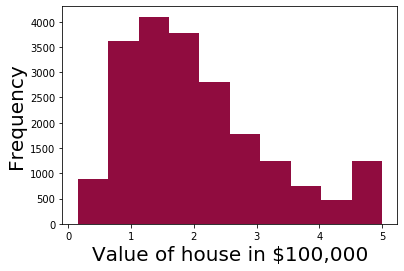

In [23]:
plt.hist(dataset.target, bins=10, color=PLOT_COLOR)
plt.xlabel('Value of house in $100,000', fontsize=LABEL_FONTSIZE)
plt.ylabel('Frequency', fontsize=LABEL_FONTSIZE)
plt.show()

We take our input data and split it into testing and training sets. We will discuss this splitting process more in a future session, but for now just think of it as selecting a subset of the data to focus on.

In [24]:
# before investigating the data, split to train and test set to avoid snooping
X_train, X_test, labels_train, labels_test = train_test_split(X, 
                                                              labels, 
                                                              test_size=TEST_SIZE,
                                                              random_state=RANDOM_STATE)
# data exploration
X_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.880754,28.608285,5.435235,1.096685,1426.453004,3.096961,35.643149,-119.582290
std,1.904294,12.602499,2.387375,0.433215,1137.056380,11.578744,2.136665,2.005654
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000
25%,2.566700,18.000000,4.452055,1.006508,789.000000,2.428799,33.930000,-121.810000
50%,3.545800,29.000000,5.235874,1.049286,1167.000000,2.817240,34.260000,-118.510000
75%,4.773175,37.000000,6.061037,1.100348,1726.000000,3.280000,37.720000,-118.010000
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000


We now would like to view histograms of each input variable.

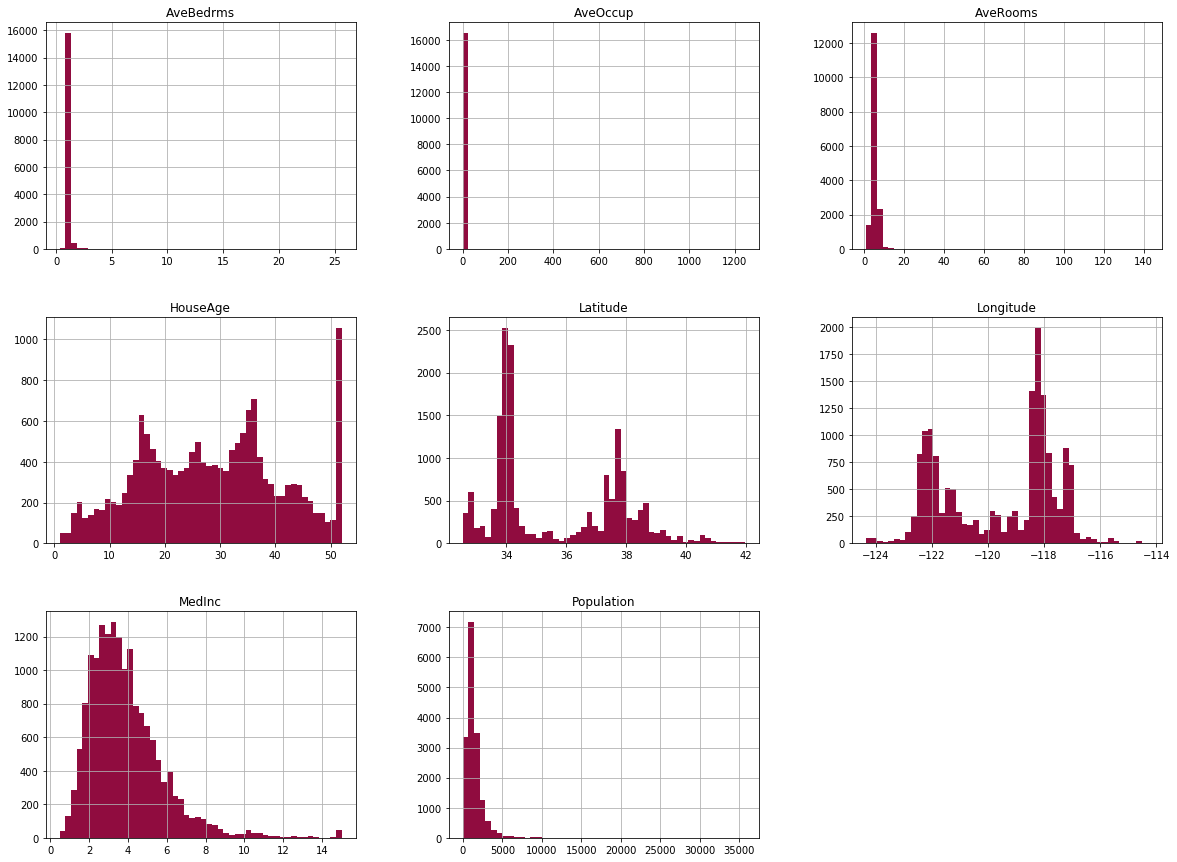

In [25]:
%matplotlib inline
X_train.hist(figsize=(20, 15), color=PLOT_COLOR, bins=50)
plt.show()

Histograms do have limitations though for bins with small values. Let's overcome that by using a scatter plot. Try uncommenting the last line and changing the y-axis limits.

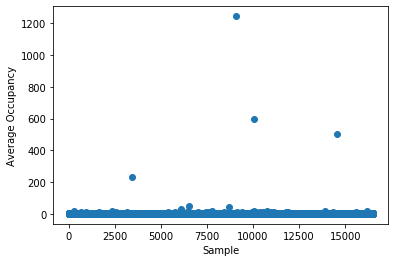

In [26]:
x_axis_values = range(len(X_train.AveOccup))
y_axis_values = X_train.AveOccup.values
plt.scatter(x_axis_values, y_axis_values)
plt.xlabel('Sample')
plt.ylabel('Average Occupancy')
plt.show()
#plt.ylim([0,50])

We understand how to look at each set of input values individually. Now let's look at them in relation to one another.

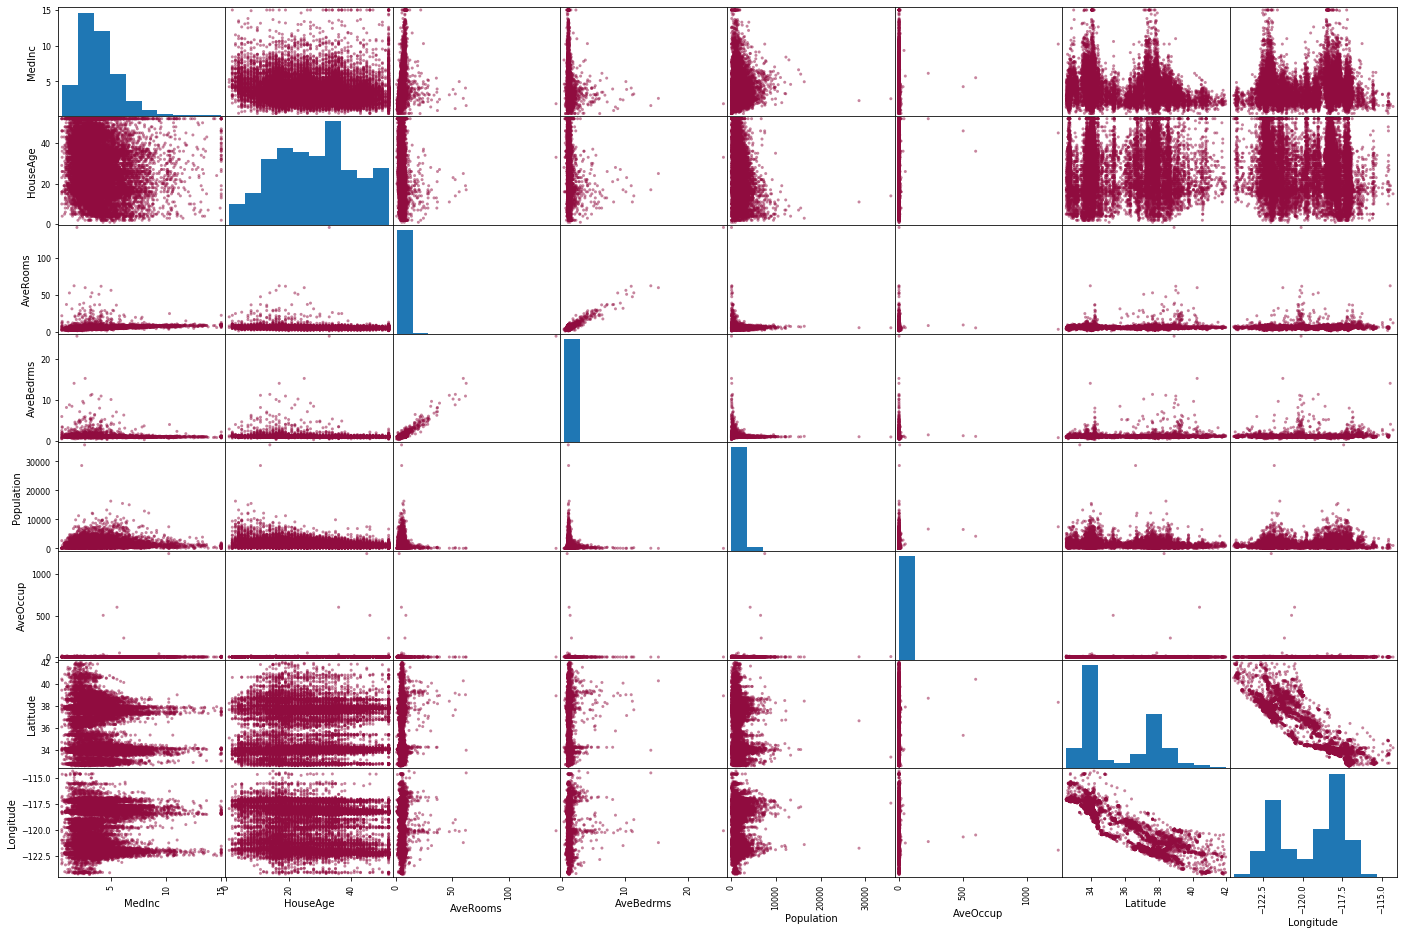

In [27]:
# check for correlations
scatter_matrix(X_train, figsize=(24, 16), color=PLOT_COLOR)
plt.show()

Any scatter plot that appears interesting can be selected individually and focused upon.

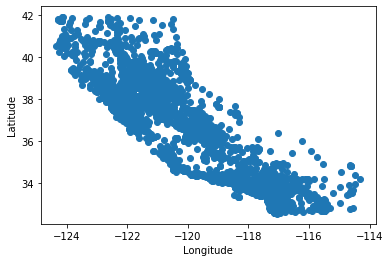

In [28]:
x_axis_values = X_train.Longitude.values
y_axis_values = X_train.Latitude.values
plt.scatter(x_axis_values, y_axis_values)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

This joint scatter plot should relate strongly to our correlation matrix. Let's take a look.

In [29]:
X_train.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.121711,0.336013,-0.072550,0.004122,0.022061,-0.076571,-0.017040
HouseAge,-0.121711,1.000000,-0.160892,-0.087983,-0.292283,0.016245,0.005296,-0.101818
AveRooms,0.336013,-0.160892,1.000000,0.836163,-0.073733,-0.004922,0.110695,-0.029339
AveBedrms,-0.072550,-0.087983,0.836163,1.000000,-0.071267,-0.006035,0.073161,0.016647
Population,0.004122,-0.292283,-0.073733,-0.071267,1.000000,0.072330,-0.102499,0.094276
AveOccup,0.022061,0.016245,-0.004922,-0.006035,0.072330,1.000000,0.005837,-0.000598
Latitude,-0.076571,0.005296,0.110695,0.073161,-0.102499,0.005837,1.000000,-0.924485
Longitude,-0.017040,-0.101818,-0.029339,0.016647,0.094276,-0.000598,-0.924485,1.000000


Let's visualize this correlation matrix.

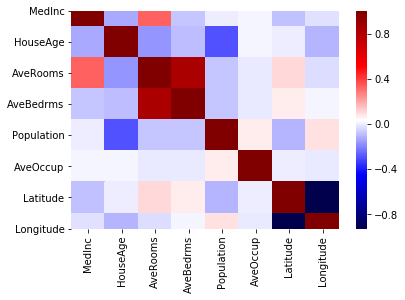

In [30]:
sns.heatmap(X_train.corr(), cmap = 'seismic')
plt.show()

You can read in your own data from Excel and do these exact same types of analyses.

In [31]:
#import data from an Excel spreadsheet saved in the same folder as the notebook (note: the data is completely made up)
running_data = pd.read_excel('./Data_input.xlsx', index_col=0)
running_data.describe()

,Miles Run,Shows Watched,Income
count,2000.000000,2000.000000,2000.000000
mean,1.044008,19.944183,1.432560
std,0.423759,0.530060,0.222590
min,-0.762343,17.125927,0.884908
25%,0.775582,19.595657,1.270479
50%,1.041687,19.958907,1.401689
75%,1.310605,20.289479,1.567120
max,3.052731,21.692912,2.607336


Let's visualize the data for correlations:

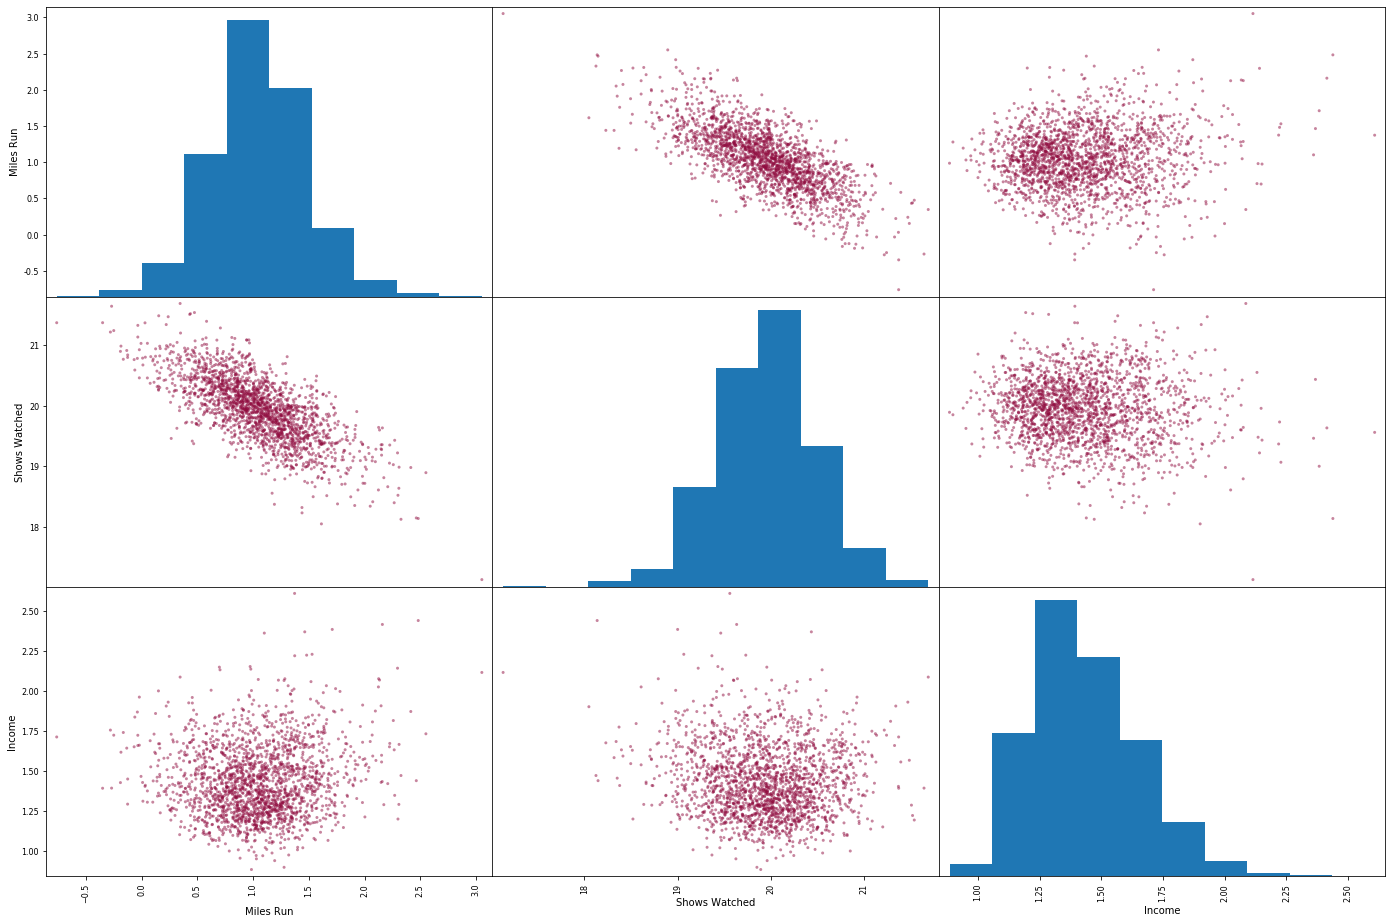

In [32]:
# check for correlations
scatter_matrix(running_data, figsize=(24, 16), color=PLOT_COLOR)
plt.show()

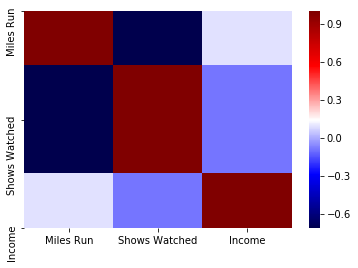

In [33]:
sns.heatmap(running_data.corr(), cmap='seismic')
plt.show()